In [146]:
import torch
# function to get pridiction of cnn model for a given image
def get_cnn_prediction(img_tsr, model, classtextfile=None, softmax=True, n=3):
    # load the class text file
    if classtextfile is not None:
        with open(classtextfile) as f:
            classes = [line.strip() for line in f.readlines()]
    # get the prediction of the model
    with torch.no_grad():
        prediction = model(img_tsr.to(torch.device('cuda:0'))).cpu().detach()
    if softmax:
        prediction = torch.nn.functional.softmax(prediction, dim=1)
    predicted_p, predicted_labels = torch.topk(prediction, n)
    pridicted_categories = list()
    if classtextfile is not None:
        # predicted_labels is a tensor of shape (numof iamges, n) where n is the number of top predictions
        # we want to get the class names of the top predictions for each image
        for i in range(predicted_labels.shape[0]):
            pridicted_categories.append([classes[lab.item()] for lab in predicted_labels[i]])
    return pridicted_categories, predicted_p, predicted_labels
    

In [164]:
import os
import sys
sys.path.append(r"C:\Users\Alireza\Documents\Git\Cosine-Project")
from inSilico_experiments.utils.func_lib import *
import matplotlib.pylab as plt
from torchvision import models

img_size = (147, 147)
pading_size = (40, 40) 

refimgdir = r"C:\Data\cosine\insilico_experiments\data\big_data_set"
refimgnms, refimgtsr = load_ref_imgs(
        imgdir=refimgdir, preprocess_type='center_crop', image_size=227)
imgtsr = resize_and_pad_tsr(refimgtsr, img_size, pading_size)

# load the model
net_model = models.alexnet(pretrained=True)
net_model.cuda().eval()
class_text_file = r"C:\Data\cosine\insilico_experiments\data\cnn_class_names\alexnet\imagenet_classes.txt"
pridicted_categories, predicted_p, predicted_labels = get_cnn_prediction(refimgtsr, net_model, classtextfile=class_text_file, softmax=True)

c:\Users\Alireza\miniconda3\envs\cosine-project\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Alireza\miniconda3\envs\cosine-project\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


'C:\\Data\\cosine\\insilico_experiments\\data\\big_data_set'

In [223]:
# plot the image and the predicted labels and their probabilities in the form of 90 degree rotated bar plot
# image to bar ratio is 3:1
data_save_path = r"N:\PonceLab\Users\Alireza\insilico_experiments\Alexnet_remonstration_across_different_layer_062023\results\input_image_with_it_pridiction"
for i in range(len(refimgtsr)):
    fig, ax = plt.subplots(2, 1, figsize=(3,5), gridspec_kw={'height_ratios': [2, 1]})
    ax[0].imshow(ToPILImage()(refimgtsr[i]))
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[1].barh(range(len(pridicted_categories[i])), predicted_p[i], align='center', color= 'gray', alpha=0.5)
    ax[1].set_yticks(range(len(pridicted_categories[i])))
    ax[1].set_yticklabels(["1st", "2nd", "3rd"], fontsize=15)
    # set the y ticks as annotations within the bars
    for j, cat in enumerate(pridicted_categories[i]):
        # set it bold
        ax[1].text(.01, j-.2, cat, color='black', fontsize=15, fontweight='bold')
    # set xtikcs font size
    ax[1].tick_params(axis='x', labelsize=15)
    #ax[1].set_xlabel('probability', fontsize=15)
    # rotate the y tick labels 45 degrees
    for tick in ax[1].get_yticklabels():
        tick.set_rotation(45)
    # save the figure as png and name it as the image name
    fig.savefig(os.path.join(data_save_path, refimgnms[i].split(".")[0] +'_plus_prid.png'), bbox_inches='tight', dpi=300)
    plt.close(fig)



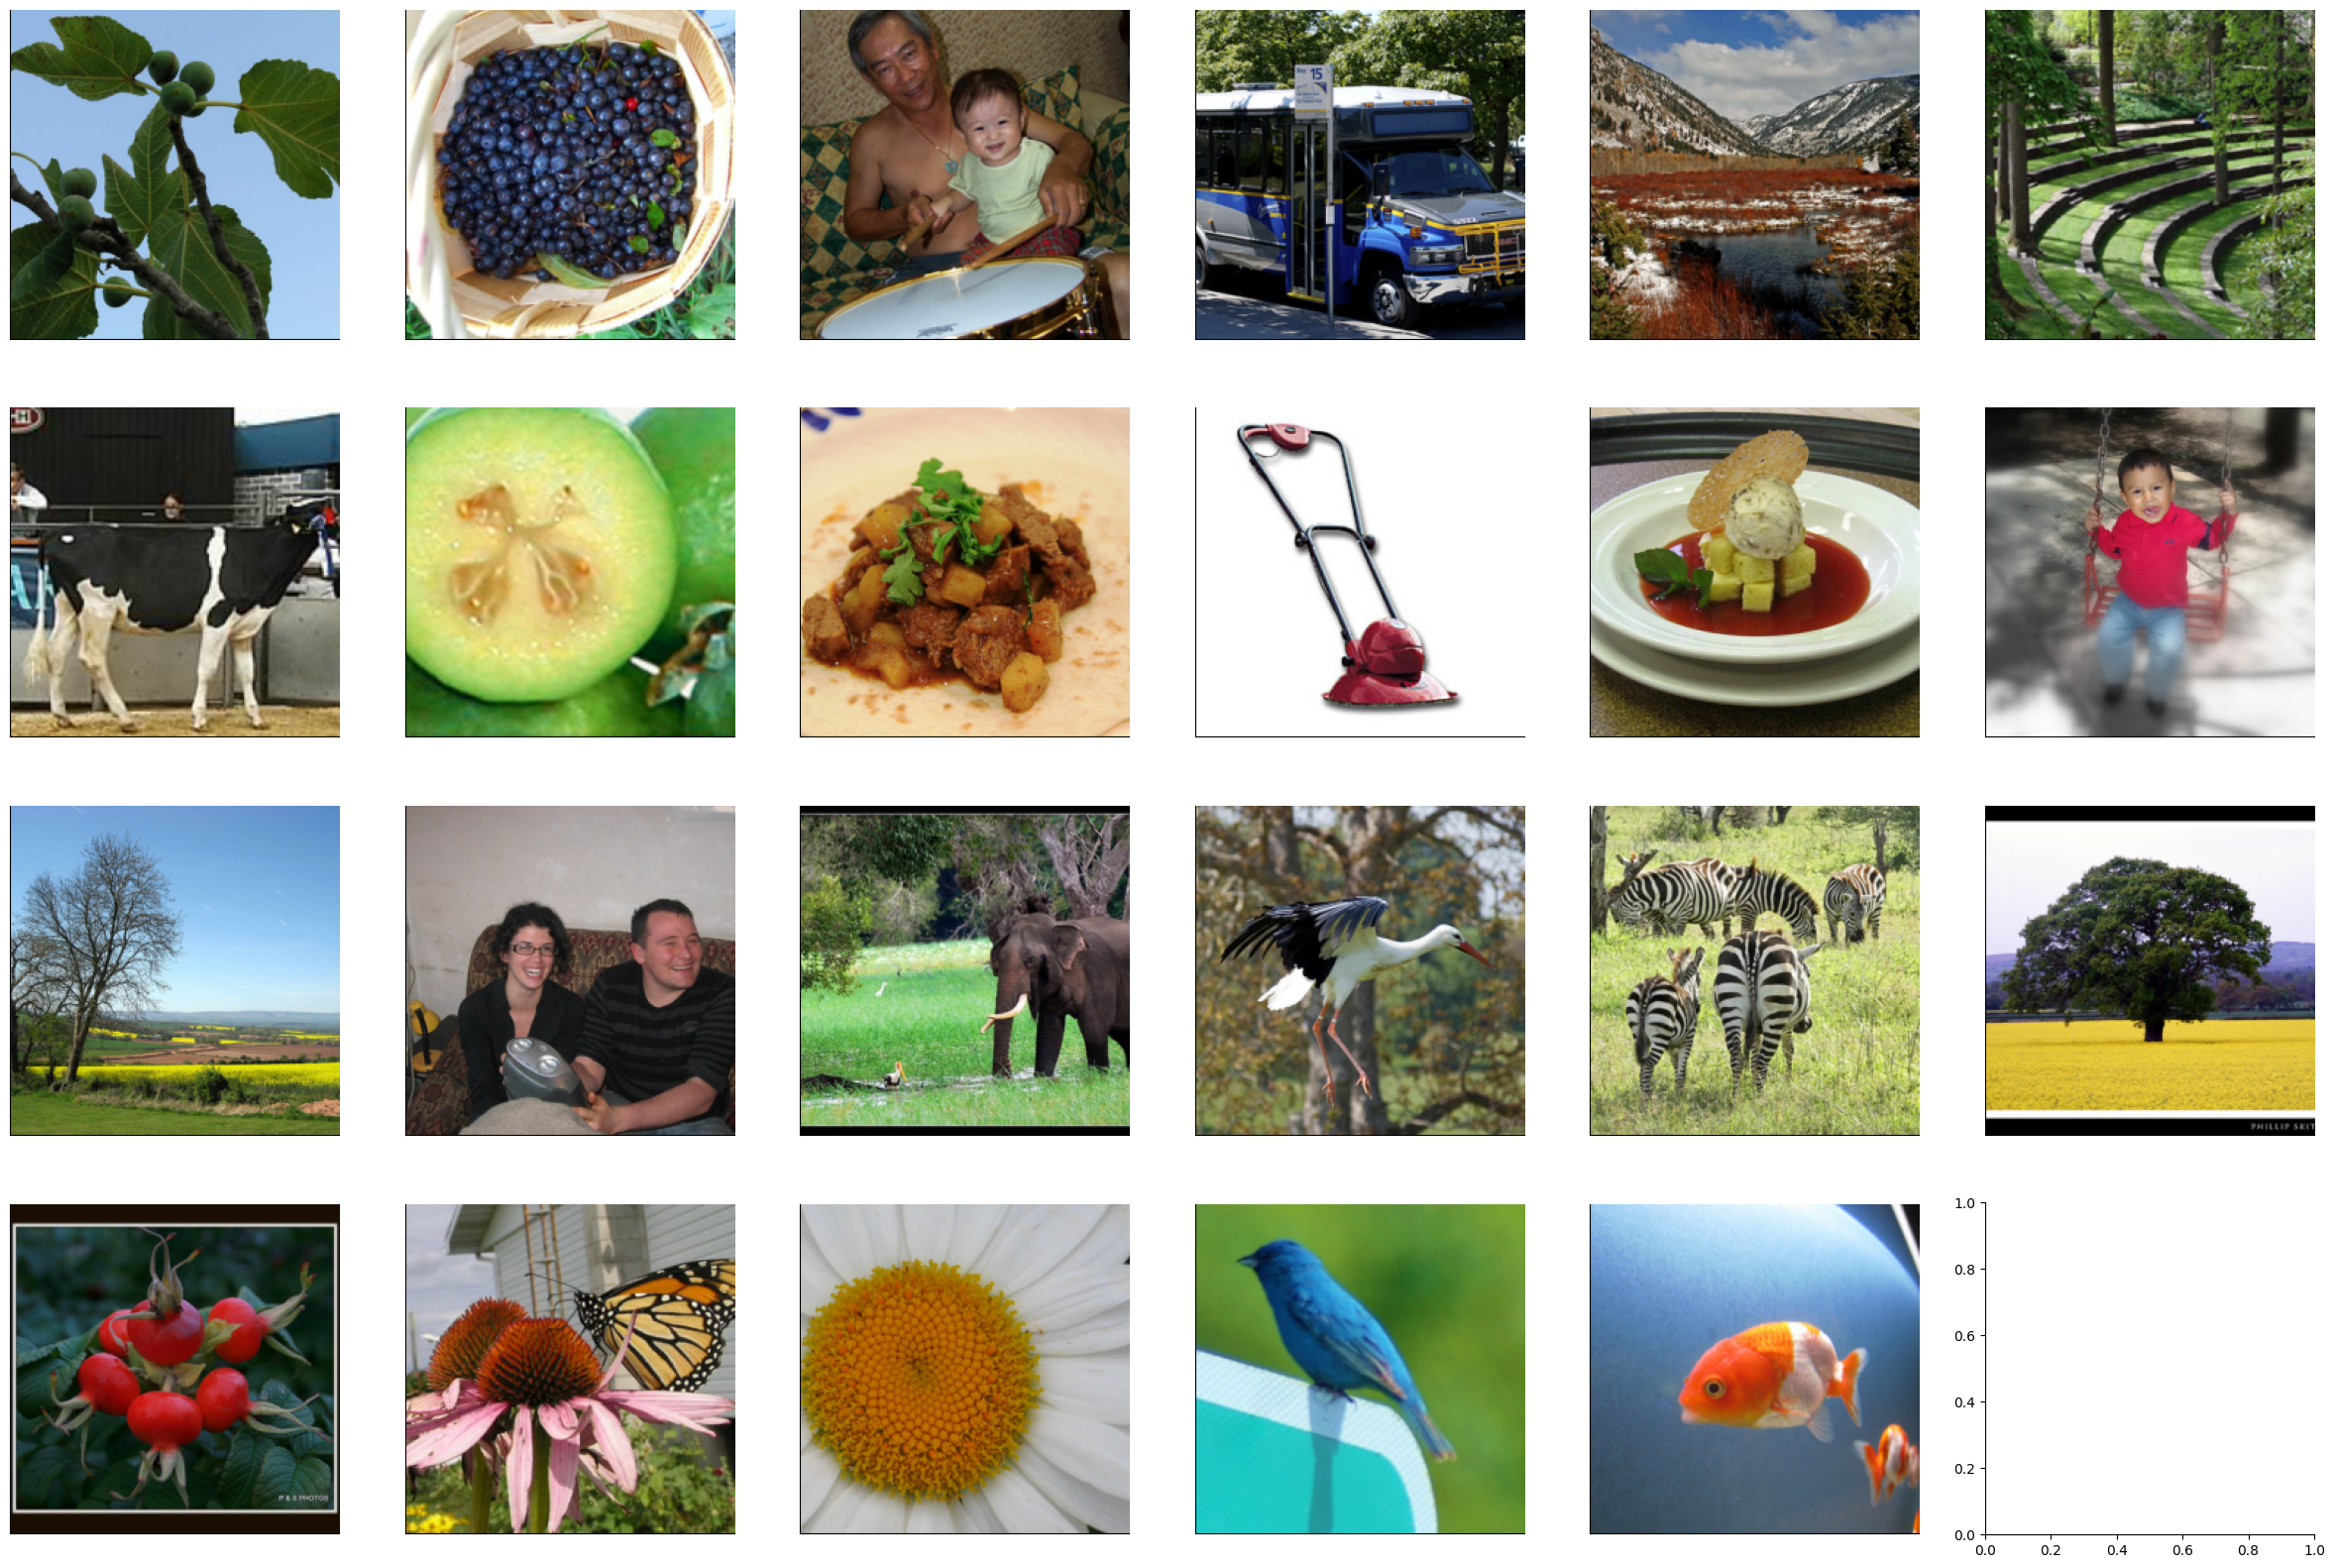

In [199]:
# plot all images in a grid
refimgtsr_inv_removed = refimgtsr
# remove the invarient images with idx 21, 23, 24, 26, 27, 28, 29, 30, 31
refimgtsr_inv_removed = torch.cat((refimgtsr_inv_removed[:21], refimgtsr_inv_removed[22:23], refimgtsr_inv_removed[25:26], refimgtsr_inv_removed[32:]), dim=0)
k = 4
j = 6
fig, ax = plt.subplots(k, j, figsize=(j*5, k*5))
for i in range(len(refimgtsr_inv_removed)):
    ax[i//j, i%j].imshow(ToPILImage()(refimgtsr_inv_removed[i]))
    ax[i//j, i%j].set_xticks([])
    ax[i//j, i%j].set_yticks([])

    #ax[i//5, i%5].set_title(i)
# save the figure as png 
data_save_path = r"N:\PonceLab\Users\Alireza\insilico_experiments\Alexnet_remonstration_across_different_layer_062023\results\input_image_with"
os.makedirs(data_save_path, exist_ok=True)
fig.savefig(os.path.join(data_save_path, 'all_images.png'), bbox_inches='tight', dpi=300)


In [211]:
# print all image names ang Idx
for i in range(len(refimgnms)):
    print(i, refimgnms[i])    

0 ecoset_10.JPEG
1 ecoset_11.JPEG
2 ecoset_12.JPEG
3 ecoset_14.JPEG
4 ecoset_16.JPEG
5 ecoset_26.JPEG
6 ecoset_31.JPEG
7 ecoset_33.JPEG
8 ecoset_49.JPEG
9 ecoset_7.JPEG
10 imagenet_116.JPEG
11 imagenet_14.JPEG
12 imagenet_18.JPEG
13 imagenet_26.JPEG
14 imagenet_35.JPEG
15 imagenet_5.JPEG
16 imagenet_52.JPEG
17 imagenet_58.JPEG
18 imagenet_7.JPEG
19 imagenet_8.JPEG
20 imagenet_83.JPEG
21 invar_1.JPEG
22 invar_1_flipped.JPEG
23 invar_2.JPEG
24 invar_2_rotated.JPEG
25 invar_3.JPEG
26 invar_3_flipped.JPEG
27 invar_3_rotated.JPEG
28 invar_4.JPEG
29 invar_4_flipped.JPEG
30 n05716342_1492.JPEG
31 n08524735_17105.JPEG


In [221]:
imagenet_photos = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 25]
ecoset_photos = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 30, 31, 28]
data_save_path =  r"N:\PonceLab\Users\Alireza\insilico_experiments\Alexnet_remonstration_across_different_layer_062023\results\input_image_with_it_pridiction"
# plot the distribution of the best prediction probelity for imagenet and ecoset images
# test wheter they are significantly different
fig, ax = plt.subplots(1, 1, figsize=(5,3))
ax.hist(predicted_p[imagenet_photos].numpy().flatten(), bins=20, alpha=0.5, label='imagenet')
ax.hist(predicted_p[ecoset_photos].numpy().flatten(), bins=20, alpha=0.5, label='ecoset')
ax.set_xlabel('probability of best prediction ', fontsize=20)
ax.set_ylabel('count', fontsize=20)
ax.legend(fontsize=15)
fig.savefig(os.path.join(data_save_path, 'best_prediction_prob.png'), bbox_inches='tight', dpi=300)
# test whether the two distributions are significantly different
from scipy.stats import ks_2samp
ks_2samp(predicted_p[imagenet_photos].numpy().flatten(), predicted_p[ecoset_photos].numpy().flatten())
#print the results

KstestResult(statistic=0.1794871794871795, pvalue=0.562189184580869, statistic_location=0.18534021, statistic_sign=-1)

In [121]:

predicted_p

tensor([[0.3296, 0.0281, 0.0452, 0.0563, 0.0643],
        [0.0186, 0.0394, 0.0433, 0.0424, 0.0494],
        [0.0071, 0.0106, 0.0083, 0.0041, 0.0041],
        [0.0078, 0.0070, 0.0094, 0.0093, 0.0100],
        [0.0046, 0.0044, 0.0069, 0.0054, 0.0064],
        [0.0115, 0.0210, 0.0294, 0.0236, 0.0236],
        [0.0032, 0.0045, 0.0060, 0.0052, 0.0045],
        [0.0523, 0.0914, 0.0304, 0.0365, 0.0380],
        [0.0045, 0.0049, 0.0053, 0.0064, 0.0071],
        [0.0238, 0.0265, 0.0477, 0.0620, 0.0344],
        [0.1659, 0.2961, 0.2966, 0.2833, 0.3289],
        [0.0073, 0.0072, 0.0112, 0.0124, 0.0097],
        [0.0138, 0.0098, 0.0067, 0.0042, 0.0050],
        [0.0083, 0.0175, 0.0199, 0.0025, 0.0024],
        [0.0027, 0.0054, 0.0086, 0.0101, 0.0093],
        [0.0024, 0.0039, 0.0043, 0.0030, 0.0036],
        [0.2177, 0.2713, 0.2027, 0.1785, 0.1397],
        [0.0016, 0.0028, 0.0055, 0.0053, 0.0062],
        [0.0140, 0.0155, 0.0201, 0.0208, 0.0184],
        [0.0061, 0.0070, 0.0073, 0.0085, 0.0054],
